In [ ]:

!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 701 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=9484f449eda165b060f2a76d7902226cbf1403f3eed6617ceae1e994093b7748
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir /root/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
pwd

'/content'

In [ ]:
!kaggle competitions download -c maskclassification

 89% 113M/127M [00:03<00:00, 21.5MB/s] 
100% 127M/127M [00:03<00:00, 33.6MB/s]


In [ ]:
!unzip maskclassification.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
data_directory =r"/content/train/train"
categories = ['without_mask','with_mask']

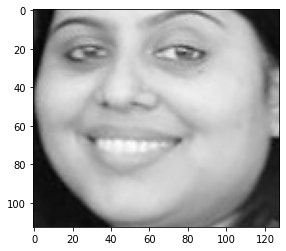

In [ ]:
for category in categories:
    path = os.path.join(data_directory,category)
    for images in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,images),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [ ]:
print(img_array.shape)

(113, 128)


In [ ]:
img_size= 150
new_images = cv2.resize(img_array,(img_size,img_size))

<function matplotlib.pyplot.show>

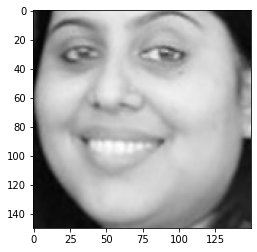

In [ ]:
plt.imshow(new_images,cmap="gray")
plt.show

In [ ]:
training_data =[]
def create_training_data():
    for category in categories:
      path = os.path.join(data_directory,category)
      class_index = categories.index(category)
      for images in os.listdir(path):
          try :
              img_array= cv2.imread(os.path.join(path,images),cv2.IMREAD_GRAYSCALE)
              new_image = cv2.resize(img_array,(img_size,img_size))
              training_data.append([new_image,class_index])
          except Exception as e:
              pass

In [ ]:
create_training_data()

In [ ]:
print(training_data)

In [ ]:
print(len(training_data))

3384


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data:
    print(sample[1])

In [ ]:
X=[]
Y=[]
for features, labels in training_data:
    X.append(features)
    Y.append(labels)


In [ ]:
X= np.array(X).reshape(-1,img_size,img_size,1)
Y = np.array(Y)

In [ ]:
print(X.shape)

(3384, 150, 150, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.15, random_state=42,stratify=Y)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

2876
2876
508
508


In [ ]:
x_train = x_train/255
x_test=x_test/255

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(1024,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(2048,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1024,activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                   tf.keras.layers.Dense(2048,activation='relu'),
                                    # tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(4096,activation='relu'),
                                   #tf.keras.layers.Dropout(0.1),
                                   tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.compile(optimizer=tf.optimizers.RMSprop(),loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=125,verbose=1)

Epoch 1/125
90/90 [==============================] - 20s 202ms/step - loss: 4.4496 - accuracy: 0.5449
Epoch 2/125
90/90 [==============================] - 18s 202ms/step - loss: 0.8218 - accuracy: 0.5396
Epoch 3/125
90/90 [==============================] - 18s 201ms/step - loss: 0.7866 - accuracy: 0.5386
Epoch 4/125
90/90 [==============================] - 18s 201ms/step - loss: 0.6723 - accuracy: 0.6373
Epoch 5/125
90/90 [==============================] - 18s 201ms/step - loss: 0.4785 - accuracy: 0.8025
Epoch 6/125
90/90 [==============================] - 18s 202ms/step - loss: 0.2525 - accuracy: 0.9287
Epoch 7/125
90/90 [==============================] - 18s 202ms/step - loss: 0.2318 - accuracy: 0.9426
Epoch 8/125
90/90 [==============================] - 18s 202ms/step - loss: 0.7683 - accuracy: 0.9475
Epoch 9/125
90/90 [==============================] - 18s 201ms/step - loss: 0.1114 - accuracy: 0.9638
Epoch 10/125
90/90 [==============================] - 18s 202ms/step - loss: 0.129

In [ ]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 1s 63ms/step - loss: 0.7567 - accuracy: 0.9882


[0.7567103505134583, 0.9881889820098877]

In [ ]:
sub_dict={'image_name':[],'label':[]}
test_dir='/content/test/test/'
for img_name in os.listdir(test_dir):

  img=cv2.imread(os.path.join(test_dir,img_name))
  #print(img.shape)
  img=cv2.resize(img,(img_size,img_size))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=np.array(img).reshape(-1,img_size,img_size,1)
  img=img/255.
  prediction = model.predict(img)
  sub_dict['image_name'].append(img_name)
  if prediction>=0.5:
      final_prediction=0
  else :
      final_prediction=1
  
  sub_dict['label'].append(final_prediction)
import pandas as pd

sub_df=pd.DataFrame(sub_dict)
print(sub_df)


In [ ]:
sub_df.to_csv('/content/sub.csv',index=None)

In [ ]:
|files.download('example_file.csv')